In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# standard modules we will always use
import pandas as pd
import numpy as np
import scipy as sp
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [378]:
def coinmarketcap_name(url):
    url = url
    content = requests.get(url).content
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find('table', {'class': 'table'})
    data = [[td.text.strip() for td in tr.findChildren('td')] 
        for tr in table.findChildren('tr')]
    df = pd.DataFrame(data)
    df.drop(df.index[0], inplace=True) # first row is empty
    
    df.columns = ['#','Name','Symbol','Market_Cap','Price','Circulating_Supply','Volume','1h_change','24h_change',
                      '7D_change','More']
    
    list1 = ['Market_Cap','Price','Circulating_Supply','Volume','1h_change','24h_change','7D_change']
    
    for item in list1:
        df[item] = [
            j.replace(',','').replace('$','').replace('?','NA').replace('\n*','').replace('%','').replace('*','').replace('Low Vol','NA')
                    for j in df[item]]
    
    df['Name'] = [ i[5:] for i in df['Name']]
    df['Name'] = [ i.replace('\n','').replace(' ','-') for i in df['Name']]
    
    df = df.drop(columns = ['More'])
    df = df.dropna()
        
    return df

In [379]:
name = coinmarketcap_name("https://coinmarketcap.com/all/views/all/")
top10 = name[0:10]
top25 = name[0:25]
top50 = name[0:50]
top100 = name[0:100]
top200 = name[0:200]




    


In [14]:
sector_data = pd.read_csv('purpose_coins.csv', names = ['Coin','Purpose'])

In [18]:
sector_data = pd.DataFrame(sector_data)

In [20]:
sector_data['Purpose'].value_counts()

Platform                      29
Misc                          14
Currency                      12
Ecosystem                     10
Privacy                       10
Currency exchange tool         7
Social network coin            4
Gaming & Gambling              4
Decentralized data storage     4
Fee token                      3
Stablecoin                     3
Cloud computing                2
Name: Purpose, dtype: int64

In [23]:
PlatformCoins = sector_data.loc[sector_data['Purpose'] == 'Platform', 'Coin']
MiscCoins = sector_data.loc[sector_data['Purpose'] == 'Misc', 'Coin']
CurrenyCoins = sector_data.loc[sector_data['Purpose'] == 'Currency', 'Coin']
EcosystemCoins = sector_data.loc[sector_data['Purpose'] == 'Ecosystem', 'Coin']
PrivacyCoins = sector_data.loc[sector_data['Purpose'] == 'Privacy', 'Coin']
CurrencyExchangeCoins = sector_data.loc[sector_data['Purpose'] == 'Currency exchange tool', 'Coin']
SocialNCoins = sector_data.loc[sector_data['Purpose'] == 'Social network coin', 'Coin']
GamingCoins = sector_data.loc[sector_data['Purpose'] == 'Gaming & Gambling', 'Coin']
DecentralStorCoins = sector_data.loc[sector_data['Purpose'] == 'Decentralized data storage', 'Coin']
FeeCoins = sector_data.loc[sector_data['Purpose'] == 'Fee token', 'Coin']
StableCoins = sector_data.loc[sector_data['Purpose'] == 'Stablecoin', 'Coin']
CloudCoins = sector_data.loc[sector_data['Purpose'] == 'Cloud computing', 'Coin']


In [388]:
def url_list(list,startdate,enddate):
    urlList = []
    for i in list:
        urlList.append(crypto_url(i,startdate,enddate))
    return urlList
        

In [387]:
#crytpo_name_list = name['Name']
def crypto_url(name, startdate, enddate): 
    url = "https://coinmarketcap.com/currencies/{}/historical-data/?start={}&end={}".format(name,startdate,enddate)
    url = str(url)
    return url


In [389]:
urlList = url_list(top10['Name'],20160724,20190404)
urlList

['https://coinmarketcap.com/currencies/Bitcoin/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/Ethereum/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/XRP/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/Litecoin/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/Bitcoin-Cash/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/EOS/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/Binance-Coin/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/Stellar/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/Cardano/historical-data/?start=20160724&end=20190404',
 'https://coinmarketcap.com/currencies/Tether/historical-data/?start=20160724&end=20190404']

In [341]:
bitcoin_url = crypto_url('bitcoin', 20160724, 20190404)
bitcoin_url

'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20160724&end=20190404'

In [347]:
def coinmarketcap_data(url):
    url = url
    content = requests.get(url).content
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find('table', {'class': 'table'})
    data = [[td.text.strip() for td in tr.findChildren('td')] 
        for tr in table.findChildren('tr')]
    df = pd.DataFrame(data)
    df.drop(df.index[0], inplace=True) # first row is empty
    df[0] =  pd.to_datetime(df[0]) # date
    
    
    
    df.columns = ['Date','Open','High','Low','Close','Volume','Market_Cap']
    list2 = ['Open','High','Low','Close','Volume','Market_Cap']
    for item in list2:
        df[item] = [pd.to_numeric(j.replace(",","").replace("-","")) for j in df[item] ] # some vol is missing and has -
    df.set_index('Date',inplace=True)
    df.sort_index(inplace=True)
    return df

In [390]:
def crypto_multiple_data(urlList, nameList):
    crypto_dict = {}
    for name in nameList:
        for url in urlList:
            crypto_dict[nameList] = coinmarketcap_data(url)
    return crypto_dict

In [391]:
crypto_dict = crypto_multiple_data(urlList,top10['Name'])
crypto_dict

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [202]:
def daily_returns(coinList):
    return_matrix = [[],[],[],[],[],[]]
    for i in range(len(coinList)):
        for j in range(len(coinList[i]['Close'])):
            return_matrix[i].append(float((coinList[i]['Close'][j] - coinList[i]['Open'][j])/coinList[i]['Open'][j]))
        
    return_matrix = pd.DataFrame(return_matrix) #index = bitcoin.index)
    return_matrix = return_matrix.T
    return_matrix.columns = ['btc_returns', 'eth_returns', 'ltc_returns', 'xrp_returns', 'etc_returns', 'xlm_returns']
    return_matrix.index = coinList[0].index
    return return_matrix
    


In [205]:
return_matrix = daily_returns(coinList)
#df2 = pd.DataFrame(index = bitcoin.index)
return_matrix.tail()


,btc_returns,eth_returns,ltc_returns,xrp_returns,etc_returns,xlm_returns
Date,,,,,,
2019-03-30,0.003548,-0.001897,-0.010286,0.009676,-0.014403,-0.002036
2019-03-31,-0.000015,-0.004432,0.001979,-0.004831,0.006263,0.002122
2019-04-01,0.012866,0.002545,-0.001481,0.011488,0.000000,0.018329
2019-04-02,0.173917,0.155950,0.255189,0.123700,0.130435,0.111951
2019-04-03,0.019070,-0.015548,0.113559,-0.025832,0.000000,-0.004267


In [206]:
block_cov = return_matrix.cov

In [207]:
#block_cov

In [208]:
block_corr = return_matrix.corr()
block_corr['btc_returns'].sort_values(ascending = False)

btc_returns    1.000000
ltc_returns    0.555981
eth_returns    0.538707
xlm_returns    0.330913
xrp_returns    0.264423
etc_returns    0.251343
Name: btc_returns, dtype: float64

In [209]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=4) # let's look at the first 20 components
pc = sklearn_pca.fit_transform(return_matrix)

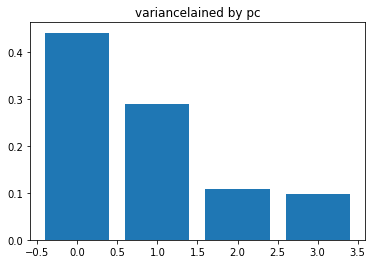

In [210]:
# plot the variance explained by pcs
plt.bar(range(4),sklearn_pca.explained_variance_ratio_)
plt.title('variancelained by pc')
plt.show()

In [211]:
sklearn_pca.explained_variance_ratio_

array([0.44175874, 0.29036062, 0.10734686, 0.09845577])

In [212]:
# get the Principal components
pcs =sklearn_pca.components_


In [213]:
# first component
pc1 = pcs[0,:]
# normalized to 1 
pc_w = np.asmatrix(pc1/sum(pc1)).T

In [214]:
# apply our first componenet as weight of the stocks
pc1_ret = return_matrix.values*pc_w

In [215]:
# plot the total return index of the first PC portfolio
pc_ret = pd.DataFrame(data =pc1_ret, index= return_matrix.index)
pc_ret_idx = pc_ret+1
pc_ret_idx= pc_ret_idx.cumprod()
pc_ret_idx.columns =['pc1']